### Get Dataset

In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

c:\users\m r\anaconda3\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: C:\Users\M R\Desktop\term8\AI\Project1\CIFAR10.tar.gz

  0%|          | 0.00/19.8M [00:00<?, ?B/s]
  3%|2         | 524k/19.8M [00:00<00:18, 1.05MB/s]
  5%|5         | 1.05M/19.8M [00:00<00:09, 1.93MB/s]
 11%|#         | 2.10M/19.8M [00:00<00:05, 3.30MB/s]
 16%|#5        | 3.15M/19.8M [00:00<00:04, 4.15MB/s]
 21%|##1       | 4.19M/19.8M [00:01<00:03, 4.66MB/s]
 27%|##6       | 5.24M/19.8M [00:01<00:02, 4.86MB/s]
 29%|##9       | 5.77M/19.8M [00:01<00:03, 4.27MB/s]
 32%|###1      | 6.29M/19.8M [00:01<00:03, 3.47MB/s]
 40%|###9      | 7.86M/19.8M [00:01<00:02, 5.14MB/s]
 45%|####5     | 8.91M/19.8M [00:02<00:01, 5.56MB/s]
 50%|#####     | 9.96M/19.8M [00:02<00:01, 5.70MB/s]
 56%|#####5 

### Data Visualization

In [34]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [35]:
base_dir = './CIFAR10'

# Directories for our training, and test splits
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
labels = os.listdir(train_dir)

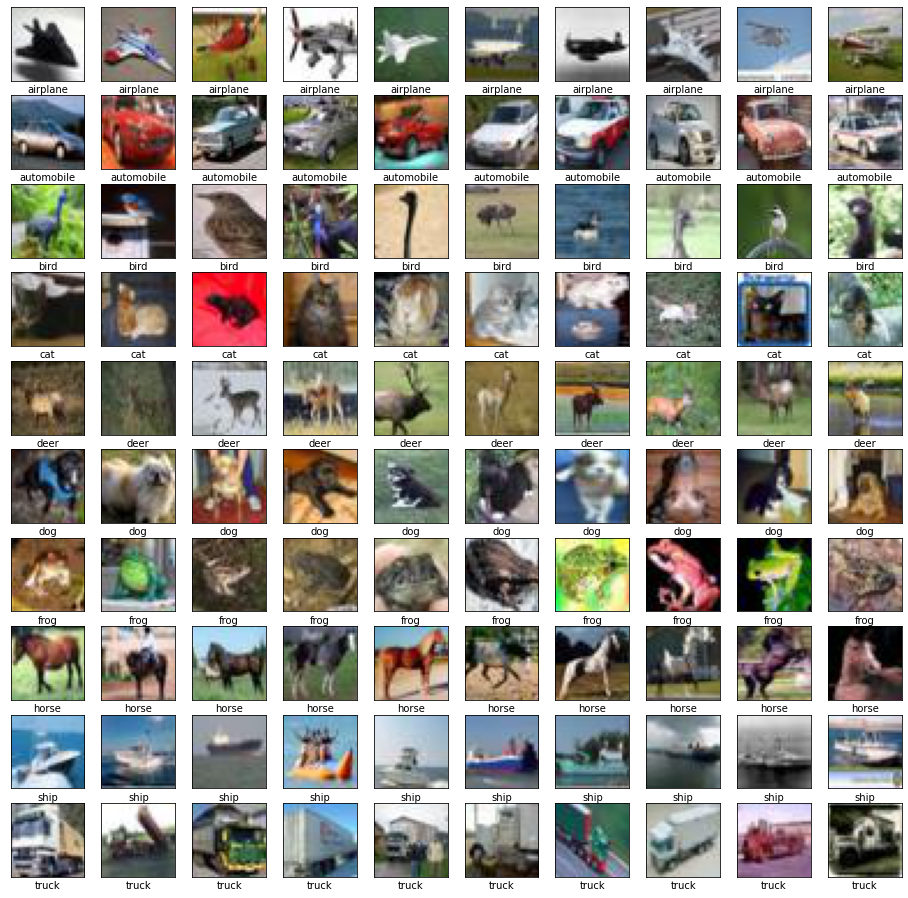

In [39]:
sample_data = []
sample_labels = []
plt.figure(figsize=(16,16))
for label in labels:
    label_path = os.path.join(train_dir, label)
    j=0
    for image_name in os.listdir(label_path):
        if j>9:
            break
        image_path = os.path.join(label_path, image_name)
        data = np.array(plt.imread(image_path))
        sample_data.append(data)
        sample_labels.append(label)
        j+=1
for i in range(len(sample_data)):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(sample_labels[i])


### Data preprocessing

In [44]:
# first four classes in dataset
labels[:4]

['airplane', 'automobile', 'bird', 'cat']

In [65]:
x_train = []
y_train_original = []
x_test = []
y_test_original = []
for label in labels[:4]:
    label_path = os.path.join(train_dir, label)
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        data = np.array(plt.imread(image_path))
        x_train.append(data)
        y_train_original.append(label)
for label in labels[:4]:
    label_path = os.path.join(test_dir, label)
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        data = np.array(plt.imread(image_path))
        x_test.append(data)
        y_test_original.append(label)

In [73]:
np.shape(x_test)

(4000, 32, 32, 3)

####  1) one-hot on y_train_original and y_test_original

In [66]:
from sklearn import preprocessing

In [67]:
# create a LabelEncoder object and fit it to each feature in y_train_original and y_test_original
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train_original)
y_test_encoded = le.fit_transform(y_test_original)

In [171]:
y_test_encoded

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [176]:
# create a OneHotEncoder object, and fit it to all of y_train_encoded and y_test_encoded
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train_encoded.reshape(-1, 1)).toarray()
y_test = enc.fit_transform(y_test_encoded.reshape(-1, 1)).toarray()

In [224]:
np.shape(y_test)

(4000, 4)

#### 2) change images to graylevel

In [177]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [178]:
x_train_gray = rgb2gray(np.array(x_train))
x_test_gray = rgb2gray(np.array(x_test))

In [179]:
np.shape(x_train_gray)

(20000, 32, 32)

#### 3) Normalization

In [180]:
# normalize our data values to the range [0, 1]
x_train_gray = x_train_gray.astype('float32')
x_test_gray = x_test_gray.astype('float32')
x_train_gray /= 255
x_test_gray /= 255

#### 4)Flatten the data

In [181]:
x_train_gray = x_train_gray.reshape(-1, 1024)
x_test_gray = x_test_gray.reshape(-1, 1024)

In [182]:
x_train_gray.shape

(20000, 1024)

#### 5)Shuffle data

In [183]:
def shuffle(x, y):
    p = np.random.permutation(y.shape[0])
    return x[p], y[p]
x_train_gray, y_train = shuffle(x_train_gray, y_train)

### Feedforward

In [218]:
# weight Matrix
W1 = np.random.rand(16, 1024)
W2 = np.random.rand(16, 16)
W3 = np.random.rand(4, 16)
# Bias vectors
b1 = np.zeros(16)
b2 = np.zeros(16)
b3 = np.zeros(4)

In [219]:
# sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [220]:
def forward_propagate(data):
    o1 = sigmoid(np.matmul(W1, data) + b1)
    o2 = sigmoid(np.matmul(W2, o1) + b2)
    return sigmoid(np.matmul(W3, o2) + b3)

In [222]:
# give data to Neural network and calculate accuracy
counter = 0
for i in range(200):
    out = forward_propagate(x_train_gray[i])
    if np.argmax(out) == np.argmax(y_train[i]):
        counter += 1
accuracy = counter/200

In [223]:
accuracy

0.265

In [251]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

### Implementing MLP class
#### (Feedforward and Backpropagation are inside this section, together)

In [256]:
class MLP:
    
    """ Here we create the weights matrix and biases vector and initialize them. 
    We get layer_size as an entry in form of list[tuple[int, int]] """
    
    def __init__(self, layer_size):
        self.weights = []
        self.biases = []
        self.layers_number = len(self.weights)+1 # with considering input_layer
        self.layer_size = layer_size
        
        #initializing weights and biases
        #  - First layer is input layer and it doesn`t have Weight 
        #    or biase. we only consider it for simplify the operations in future.
        #    but we don`t use this layer weight or biase in calculations.
        self.weights.append(np.random.normal(size=(layer_size[0][1], layer_size[0][1])))
        self.biases.append(np.zeros(layer_size[0][1]))
        #  - For other layers(hidden and output) we have:
        for size in layer_size:
            self.weights.append(np.random.normal(size=size))
            self.biases.append(np.zeros(size[0]))
        
    """ In feedforward function for calculating output according to entries
    we should calculate:
                a(L+1) = sigmoid_func(W(L+1)×a(L)+b(L+1))
    after all (a) contains the output of each layer"""
    
    def feedforward(self, data):
        W = self.weights
        b = self.biases
        a = []
        # First layer is input layer and its output is data
        a.append(data)
        # for other layers we have:
        for L in range(self.layers_number):
            layer_output = sigmoid(np.matmul(W[L+1], a[L]) + b[L+1])
            a.append(layer_output)
        return a
    
    """ For trasining a MLP we need x_train and y_train and also some hyperparameters
    In this function we get batch_size and number_of_epochs and learning_rate
    as entry hyperparameters. They have default value 16, 10, 0.3.
    Backpropagation is performing here."""
    
    def train(self, x, y, batch_size=16, number_of_epochs=10, learning_rate=0.3):
        W = self.weights
        b = self.biases
   
        # Performing learning algorithm
        avg_cost_values = []
        for i in range(number_of_epochs):
            x_train, y_train = shuffle(x_train, y_train)
            cost_values = []
            for j in range(0, x.shape[0], batch_size):
                batch_of_x_train = x_train[j:j+batch_size, :]       # A batch of inputs
                batch_of_y_train = y_train[j:j+batch_size, :]       # Expected Output
                
                grad_W, grad_b = grad_creator()
                
                for image in batch_of_x_train:
                    a = self.feedforward(image)             # Outputs of each layer for the given batch
                    cost = self.cost_function(a[self.layers_number-1], batch_of_y_train)
                    cost_values.append(cost)
                    for k in range(self.layers_number-1,0,-1):
                        grad_W[k] += d_cost(a[self.layers_number-1], batch_of_y_train)* d_sigmoid(a[k])
                        
                m = batch_of_x_train.shape[0]
                if m == 0:
                    continue
                
                # Back Propagation Phas
                e2 = d_loss * d_sigmoid(out[2])
                e1 = w[2].dot(e2) * d_sigmoid(out[1])
                e0 = w[1].dot(e1) * d_sigmoid(out[0])
                
                w[0] -= self.learning_rate * (1/m) * data.dot(e0.T)
                w[1] -= self.learning_rate * (1/m) * out[0].dot(e1.T)
                w[2] -= self.learning_rate * (1/m) * out[1].dot(e2.T)
                
                b[0] -= self.learning_rate * (1/m) * np.sum(e0.T, axis=0)
                b[1] -= self.learning_rate * (1/m) * np.sum(e1.T, axis=0)
                b[2] -= self.learning_rate * (1/m) * np.sum(e2.T, axis=0)
            validation_values.append(cost)
            
        plt.plot(range(epoch_number), validation_values)
    
    def grad_creator(self):
        grad_W = []
        grad_b = []
        for size in self.layer_size:
            self.grad_W.append(np.zeros(size=size))
            self.grad_b.append(np.zeros(size[0]))
        return grad_W, grad_b
            
    def test(self, x, y):
        out = self.feed(x)
        maximum = np.argmax(out[-1], axis=0)
        equality = (maximum == np.argmax(y, axis=0)).astype('int')
        return sum(equality) / y.shape[1]
    
    def cost_function(self, y_output, y_target, cost_function_type='SSE'):
        if function_type == 'SSE':
            return (y_output - y_target).dot(y_output - y_target)
    def d_cost(self, y_output, y_target, cost_function_type='SSE'):
        if function_type == 'SSE':
            return 2*(y_output - y_target)

In [ ]:
# Create neural network object
mlp = MLP([(102, 150), (150, 60), (60, 4)])

# Using 200 items of test set to see the accuracy for Phase 1
print('Accuracy before train:', mlp.test(x_test[:, :200], y_test[:, :200]))

# Training the model
tik = time.time()
mlp.train(x_train[:, :200], y_train[:, :200])
tok = time.time()
print('Training finished within', tok - tik, 's')

# Using whole test set to see the accuracy
print('Accuracy after train:', mlp.test(x_test, y_test))

print('Train Set Accuracy:', mlp.test(x_train[:, :200], y_train[:, :200]))

In [237]:
for i in range(4,2):
    print(i)

In [ ]:
class MLP:
    
    """ Here we create the weights matrix and biases vector and initialize them. 
    We get layer_size as an entry in form of list[tuple[int, int]] """
    
    def __init__(self, layer_size):
        self.weights = []
        self.biases = []
        self.layers_number = len(self.weights)+1 # with considering input_layer
        
        #initializing weights and biases
        #  - First layer is input layer and it doesn`t have Weight 
        #    or biase. we only consider it for simplify the operations in future.
        #    but we don`t use this layer weight or biase in calculations.
        self.weights.append(np.random.normal(size=(layer_size[0][1], layer_size[0][1])))
        self.biases.append(np.zeros(layer_size[0][1]))
        #  - For other layers(hidden and output) we have:
        for size in layer_size:
            self.weights.append(np.random.normal(size=size))
            self.biases.append(np.zeros(size[0]))
        
    """ In feedforward function for calculating output according to entries
    we should calculate:
                a(L+1) = sigmoid_func(W(L+1)×a(L)+b(L+1))
    after all (a) contains the output of each layer"""
    
    def feedforward(self, data):
        W = self.weights
        b = self.biases
        a = []
        # First layer is input layer and its output is data
        a.append(data)
        # for other layers we have:
        for L in range(self.layers_number):
            layer_output = sigmoid(np.matmul(W[L+1], a[L]) + b[L+1])
            a.append(layer_output)
        return a
    
    """ For trasining a MLP we need x_train and y_train and also some hyperparameters
    In this function we get batch_size and number_of_epochs and learning_rate
    as entry hyperparameters. They have default value 16, 10, 0.3 and 0.2.
    Backpropagation is performing here."""
    
    def train(self, x, y, batch_size=16, number_of_epochs=10, learning_rate=0.3, validation=0.2):
        W = self.weights
        b = self.biases
        
        # Seperating train and validation data
        seperator_index = int(validation * x.shape[0])
        x_train = x[seperator_index:, :]
        y_train = y[seperator_index:, :]
        x_valid = x[:seperator_index, :]
        y_valid = y[:seperator_index, :]
        
        # Performing learning algorithm
        validation_values = []
        for i in range(number_of_epochs):
            x_train, y_train = shuffle(x_train, y_train)
            cost = 0
            for j in range(0, x.shape[0], batch_size):
                batch_of_x_train = x_train[j:j+batch_size, :]       # A batch of inputs
                batch_of_y_train = y_train[j:j+batch_size, :]       # Expected Output
                
                layer_outputs = self.feedforward(batch_of_x_train)             # Outputs of each layer for the given batch
                
                m = batch_of_x_train.shape[0]
                if m == 0:
                    continue
                
                # Back Propagation Phase
                d_loss = self.d_loss_function(layer_outputs[self.layers_number-1], batch_of_y_train)
                cost += np.sum(d_loss * d_loss) / (2*m)
                e2 = d_loss * d_sigmoid(out[2])
                e1 = w[2].dot(e2) * d_sigmoid(out[1])
                e0 = w[1].dot(e1) * d_sigmoid(out[0])
                
                w[0] -= self.learning_rate * (1/m) * data.dot(e0.T)
                w[1] -= self.learning_rate * (1/m) * out[0].dot(e1.T)
                w[2] -= self.learning_rate * (1/m) * out[1].dot(e2.T)
                
                b[0] -= self.learning_rate * (1/m) * np.sum(e0.T, axis=0)
                b[1] -= self.learning_rate * (1/m) * np.sum(e1.T, axis=0)
                b[2] -= self.learning_rate * (1/m) * np.sum(e2.T, axis=0)
            validation_values.append(cost)
            
        plt.plot(range(epoch_number), validation_values)
    
    def test(self, x, y):
        out = self.feed(x)
        maximum = np.argmax(out[-1], axis=0)
        equality = (maximum == np.argmax(y, axis=0)).astype('int')
        return sum(equality) / y.shape[1]
    
    def d_loss_function(self, output, y_expected, function_type='SSE'):
        if function_type == 'SSE':
            return output - y_expected
        

In [255]:
y1 = np.array([1 , 5 , 10])
y2 = np.array([2, 5, 13])
y1*y2

array([  2,  25, 130])

In [254]:
for i in range(4,-1,-1):
    print(i)

4
3
2
1
0


In [253]:
range(4,-1)

range(4, -1)